In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\disha\Downloads\KNN\KNN\Zoo.csv")

In [3]:
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Analyze the Data using Visualizations

# Distribution of different types of animals

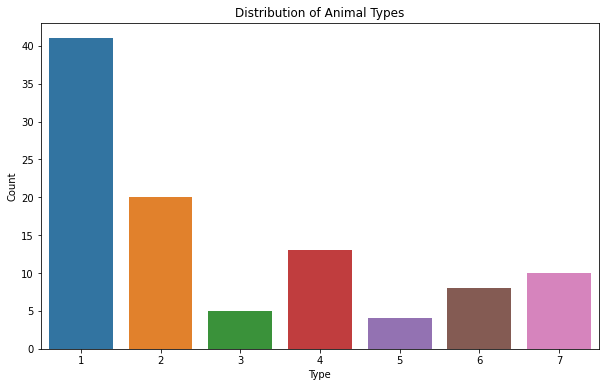

In [4]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=data)
plt.title('Distribution of Animal Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Correlation heatmap

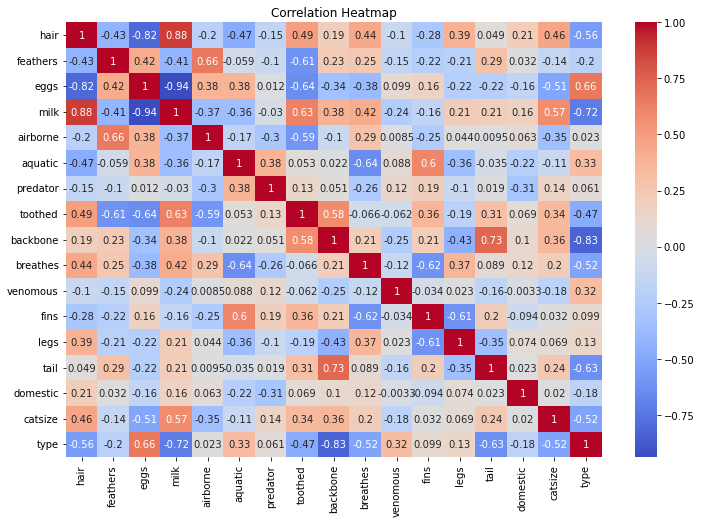

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocess the Data

# Check for missing values

In [10]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

there are no missing values in any column of the dataset.

# Check for outliers

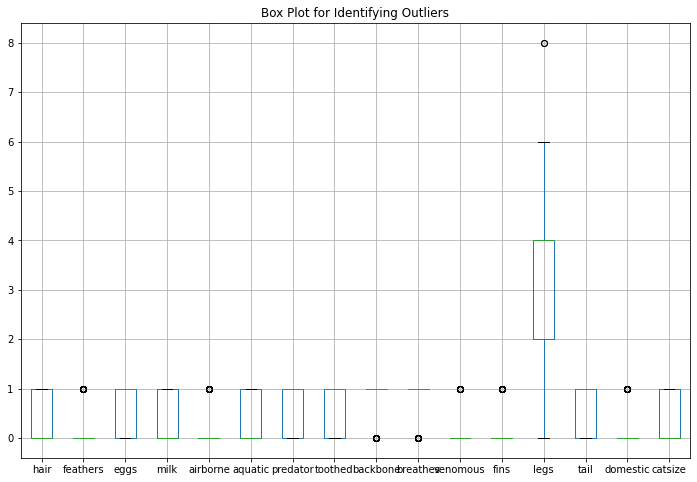

In [11]:
plt.figure(figsize=(12, 8))
data.iloc[:, 1:-1].boxplot()
plt.title('Box Plot for Identifying Outliers')
plt.show()

# Split the Dataset into Training and Testing Sets

In [22]:
X = data.drop(columns=['animal name', 'type'])
y = data['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 80
Testing set size: 21


# Implement the K-Nearest Neighbors Algorithm

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

# Choose an Appropriate Distance Metric and Value for K

In [43]:
param_grid = {'n_neighbors': range(1, 31), 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1}


# Evaluate the Classifier's Performance

In [28]:
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



Accuracy: Approximately 95.24% of the samples in the testing set are correctly classified by the model.

Precision: About 95.96% of the samples predicted as positive by the model are actually positive.

Recall: Around 95.96% of the true positive samples are correctly identified by the model.

F1 Score: The harmonic mean of precision and recall is approximately 95.24%, providing a balanced measure of the classifier's performance.

# Visualize the Decision Boundaries

In [40]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn_pca = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], metric=best_params['metric'])
knn_pca.fit(X_train_pca, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

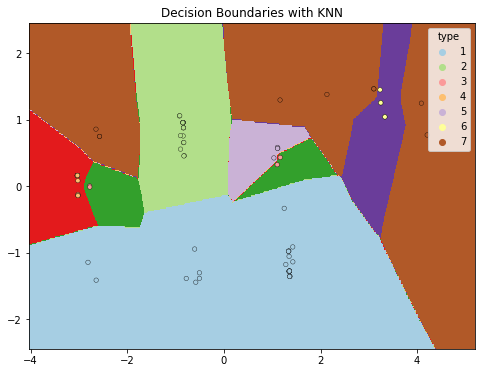

In [41]:
def plot_decision_boundaries(X, y, model):
    h = .02  
    cmap_light = plt.cm.Paired
    cmap_bold = plt.cm.Paired
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundaries with KNN")
    plt.show()
plot_decision_boundaries(X_train_pca, y_train, knn_pca)

This plot illustrates how the KNN algorithm separates different types of animals in the feature space. Each region in the plot is colored according to the predicted animal type, showing the areas where the model predicts each type.